# Split Overlay
This overlay splits the screen in two parts
    - RGB part
    - part R
    - column of split is user-defined

In [18]:
from pynq import Overlay
from pynq import MMIO
from pynq.lib.video import *

base = Overlay("/home/xilinx/pynq/overlays/base/top.bit")
base.download()

In [19]:
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

 
hdmi_in.configure(PIXEL_RGB)
hdmi_in.start()
 
hdmi_out.configure(hdmi_in.mode)
hdmi_out.start()

In [20]:
colorspace_in = base.video.hdmi_in.color_convert
colorspace_out = base.video.hdmi_out.color_convert

bgr2rgb = [0, 0, 1,
           0, 1, 0, 
           1, 0, 0,
           0, 0, 0]

out =     [0, 0, 1,
           0, 1, 0, 
           1, 0, 0,
           0, 0, 0]



colorspace_in.colorspace = bgr2rgb
colorspace_out.colorspace = out

In [21]:
hdmi_in.tie(hdmi_out)


## Setting the column index

In [22]:
sobel_ip = MMIO(0x43C00000,0x10000)
sobel_ip.write(0x10,500)

sobel_ip.read(0x10)

500

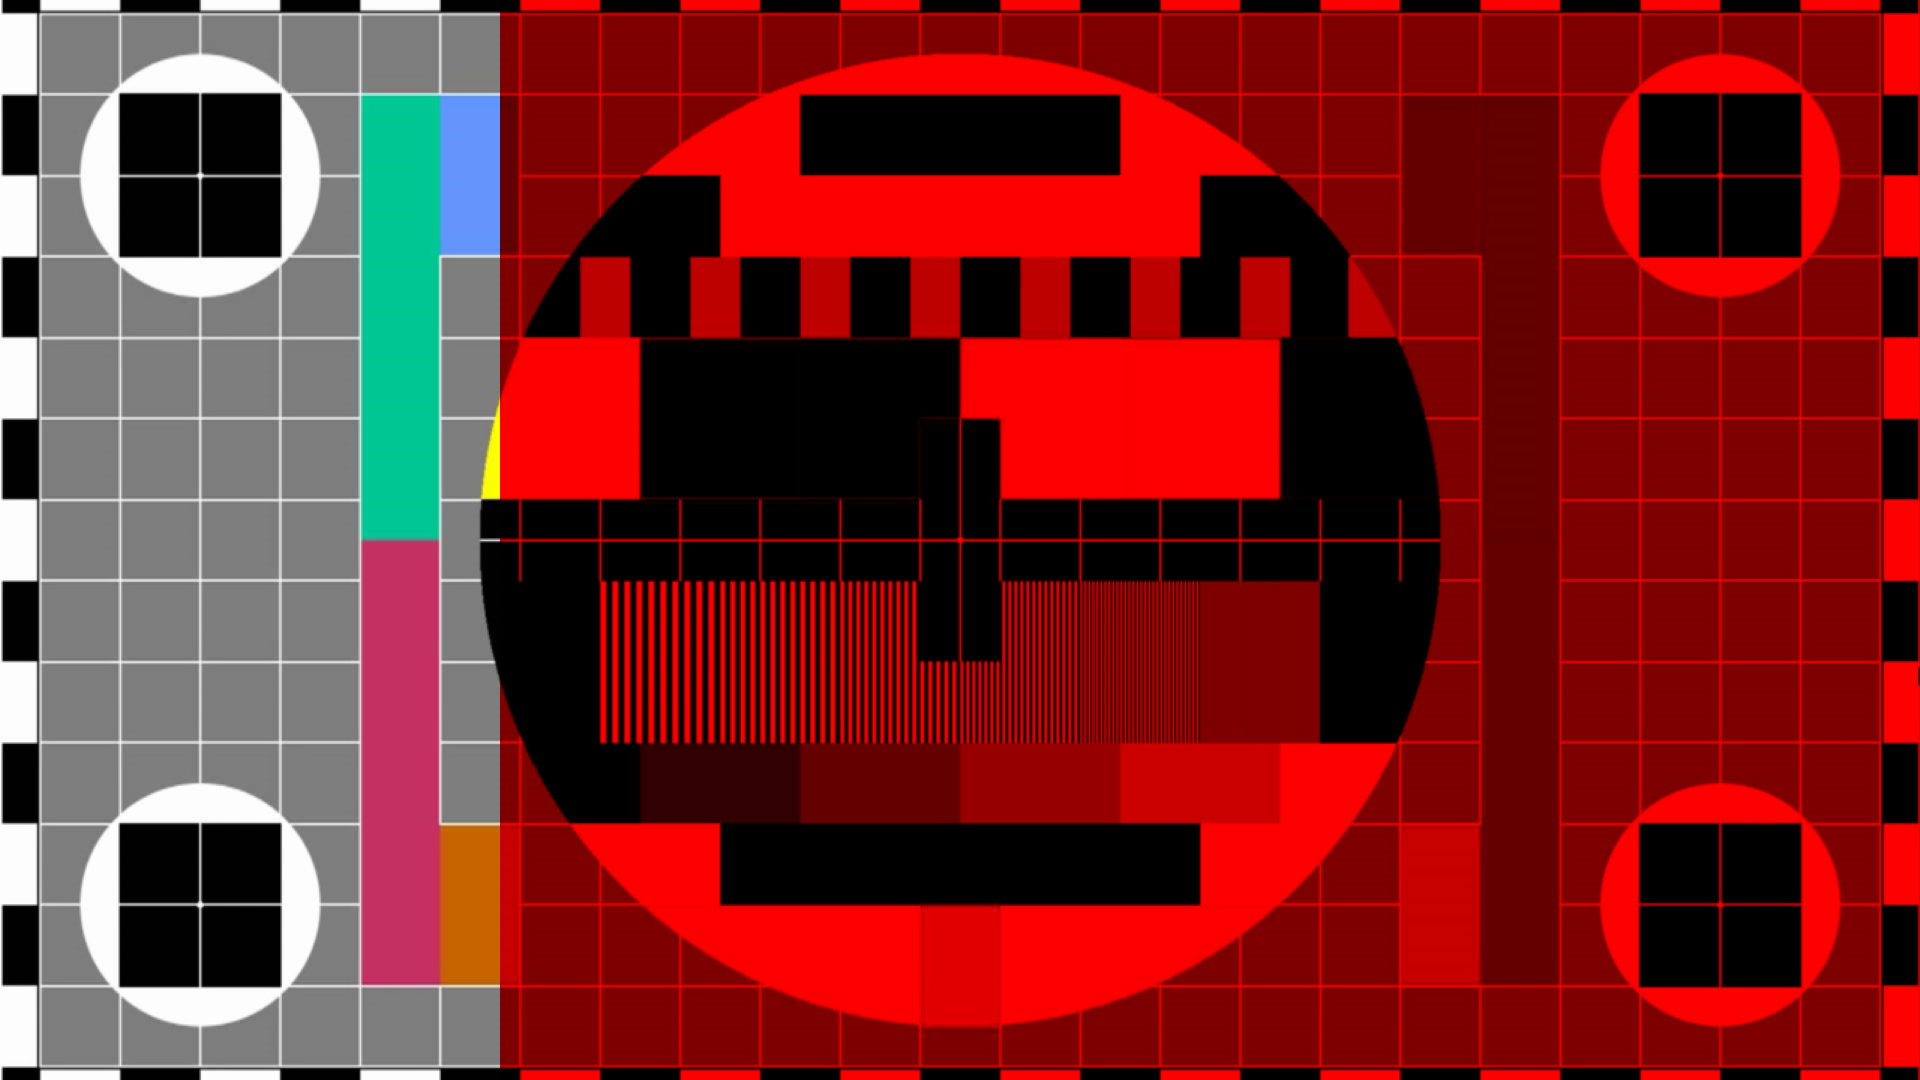

In [17]:
import PIL.Image
import time
time.sleep(2)
frame = hdmi_in.readframe()
image = PIL.Image.fromarray(frame)
image